In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

def make_map(image_folder, filename, rows, cols):

    # Load the images into a grid (row-wise)
    tiles = []

    for i in range(rows):  # Assuming col represents the number of columns
        col_tiles = []
        for j in range(cols):  # Assuming row represents the number of rows
            file = f"{filename}_{i}_{j}.png"
            img = Image.open(os.path.join(image_folder, file))
            col_tiles.append(img)
        tiles.append(col_tiles)

    # Get the size of each tile (assuming all tiles are of the same size)
    tile_width, tile_height = tiles[0][0].size

    # Calculate the total width and height of the stitched image
    full_width = cols * tile_width  # Width should be based on columns
    full_height = rows * tile_height  # Height should be based on rows

    # Create a blank image for the full grid
    full_image = Image.new('RGB', (full_width, full_height))  # Use correct width and height

    # Paste each row of images into the full image


    y_offset = 0
    for col_list in tiles:
        x_offset = 0
        for sing_img in col_list:
            full_image.paste(sing_img, (x_offset, y_offset))
            x_offset += tile_width
        y_offset += tile_height

    # Convert the stitched image to a format suitable for plotting
    full_image_np = np.array(full_image)

    # Plot the stitched image
    plt.figure(figsize=(10, 10))
    plt.imshow(full_image_np)
    plt.axis('off')  # Turn off the axis
    plt.show()

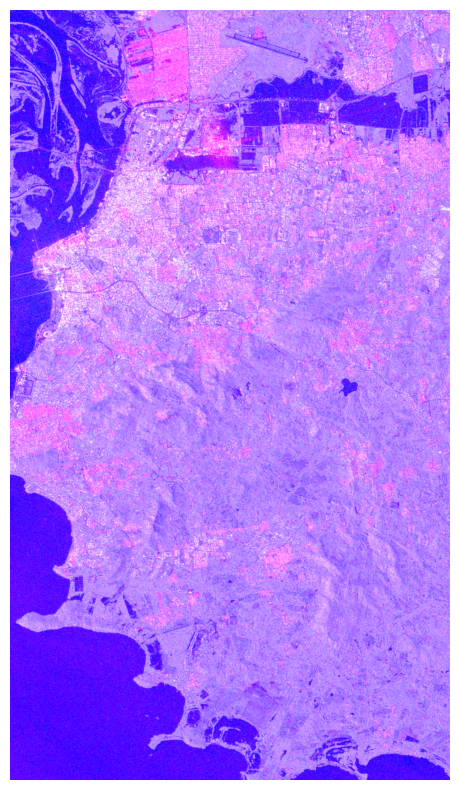

In [3]:
make_map("test_images/porto_alegre_s1", "porto_alegre_images", 7, 4)

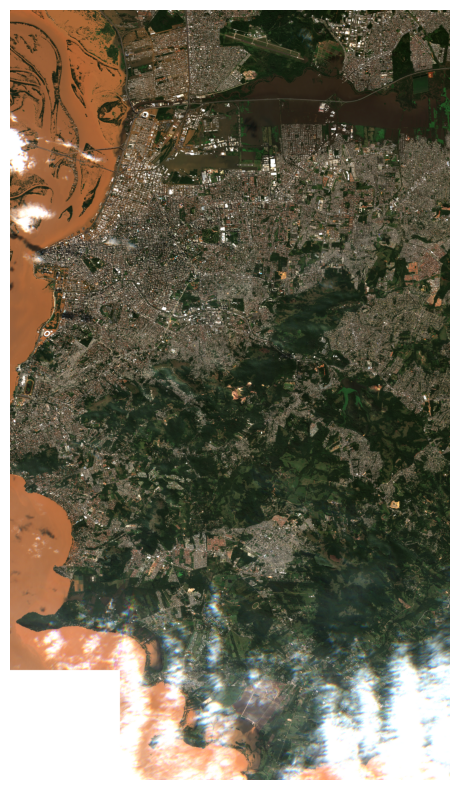

In [4]:
make_map("test_images/porto_alegre_s2", "porto_alegre_images", 7, 4)

In [ ]:
make_map("test_images/masks", "tile", 7, 4)